In [164]:
from prep_image import prep_im
from MyModel import *

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
feature_data = '..' + os.sep + "feature_data.csv"
meta_data = '..' +  os.sep + 'metadata_withmasks.csv'

image_folder = '..' +  os.sep + 'test_images' + os.sep
mask_folder = '..' +  os.sep + 'test_images_masks' + os.sep

In [134]:
# Extract image ids and labels
df = pd.read_csv(meta_data)
df_features = pd.read_csv(feature_data)

# Remove data for images without masks
df_mask = df['mask'] == 1
df = df.loc[df_mask]

# Extract labels for images
labels = df['diagnostic']

X=df_features[feature_names]
y = (labels == 'BCC') | (labels == 'SCC') | (labels == 'MEL') 

In [135]:
feature_names = ['mean_assymmetry', 'best_asymmetry', 'worst_asymmetry', 'red_var', 'green_var', \
     'blue_var', 'hue_var', 'sat_var', 'val_var', 'dom_hue', 'dom_sat', 'dom_val', \
     'compactness', 'area', 'perimeter', 'convexity', 'F1', 'F2', 'F3', 'F10', 'F11', 'F12']

In [136]:
feature_selector = train_feature_selector(X,y,5)
scores = feature_scores(feature_selector)

In [137]:
scores_sorted = np.sort(scores)[::-1]
threshold = scores_sorted[5]

In [138]:
def plot_feature_scores(scores, X_train):
    # Get no. of features
    features = len(scores)

    # Visualize feature scores
    plt.bar(np.arange(0,features), scores, width=.2)
    plt.xticks(np.arange(0,features), list(X_train.columns), rotation='vertical')
    plt.axhline(y=threshold, color='r')
    plt.show()

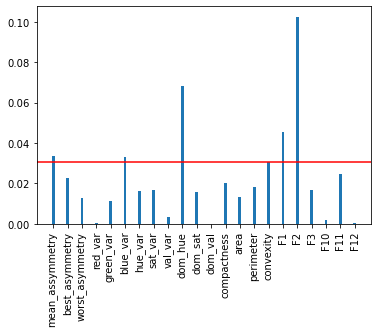

In [139]:
plot_feature_scores(scores, X)

In [140]:
df_features[feature_names].columns[scores > threshold]

Index(['mean_assymmetry', 'blue_var', 'dom_hue', 'F1', 'F2'], dtype='object')

In [141]:
df_features.insert(len(df_features.columns), 'cancer',y)

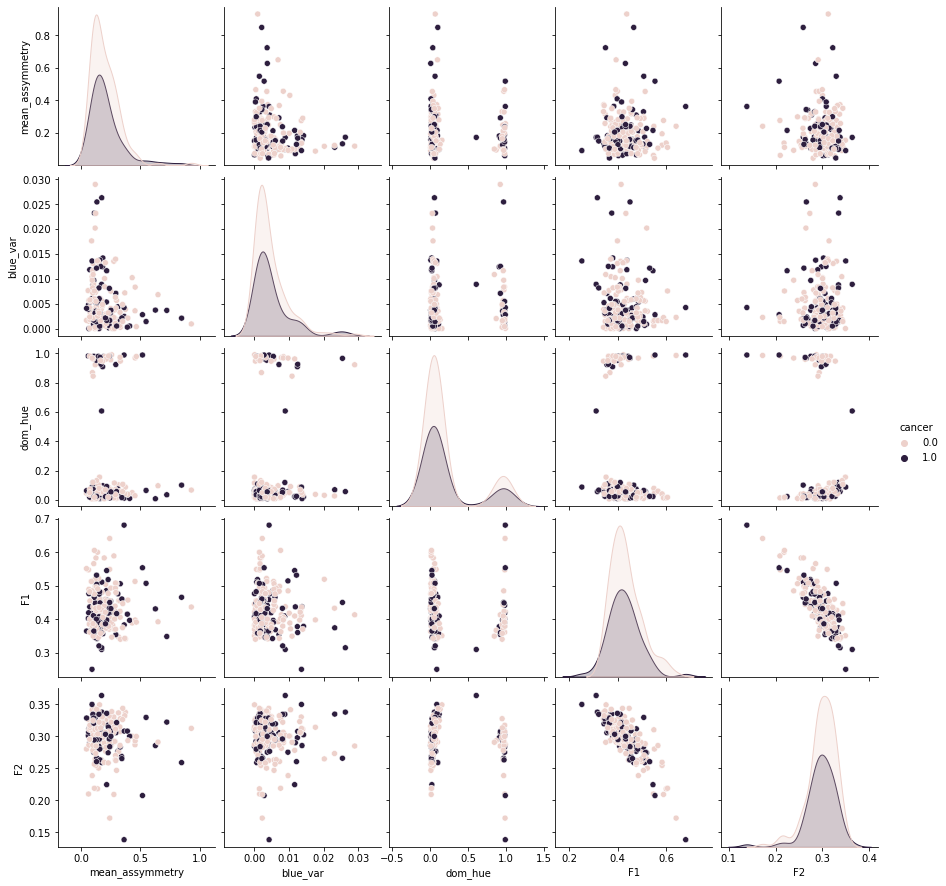

In [142]:
sns.pairplot(vars=df_features[feature_names].columns[scores > threshold], data=df_features, hue='cancer')

                      PC0       PC1       PC2       PC3       PC4       PC5  \
mean_assymmetry  0.342755  0.087861  0.259627  0.210513 -0.079798 -0.034811   
best_asymmetry   0.343218  0.068396  0.253854  0.181186 -0.058815 -0.003936   
worst_asymmetry  0.323951  0.088651  0.247995  0.207851 -0.082216 -0.039842   
red_var         -0.256362 -0.053805  0.369627  0.005603 -0.100984 -0.114334   
green_var       -0.182906 -0.174708  0.377933 -0.196717 -0.124962 -0.002222   
blue_var        -0.153242 -0.216305  0.348131 -0.216336 -0.112536  0.062526   
hue_var         -0.041178 -0.236768  0.049747  0.236441 -0.024800 -0.060444   
sat_var         -0.175905 -0.033046  0.274438 -0.013492 -0.045900  0.177147   
val_var         -0.252678 -0.067458  0.377962 -0.008374 -0.115142 -0.111515   
dom_hue         -0.001613 -0.136160 -0.011778  0.004108 -0.020561  0.730662   
dom_sat         -0.082453  0.401003  0.034746 -0.189899 -0.045545  0.002547   
dom_val          0.161812  0.004713  0.080994 -0.379

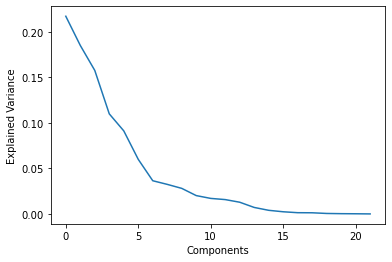

In [168]:
X_normalized=(X - X.mean()) / X.std()
pca = PCA(n_components=X.shape[1])
pca.fit(X_normalized)
X_transformed = pca.transform(X)

loadings = pd.DataFrame(pca.components_.T,
    columns=['PC%s' % _ for _ in range(len(X_normalized.columns))],
    index=X.columns)

print(loadings)

plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()

In [169]:
feature_selector = train_feature_selector(X_transformed,y,5)
scores = feature_scores(feature_selector)

In [170]:
scores_sorted = np.sort(scores)[::-1]
threshold = scores_sorted[5]

In [171]:
def plot_feature_scores(scores, X_train):
    # Get no. of features
    features = len(scores)

    # Visualize feature scores
    plt.bar(np.arange(0,features), scores, width=.2)
    plt.xticks(np.arange(0,features), list(X_train.columns), rotation='vertical')
    plt.axhline(y=threshold, color='r')
    plt.show()

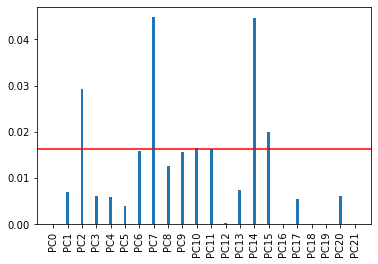

In [173]:
plot_feature_scores(scores, loadings)

In [ ]:
df_features.insert(len(df_features.columns), 'cancer',y)

In [ ]:
sns.pairplot(vars=df_features[feature_names].columns[scores > threshold], data=df_features, hue='cancer')